<font size="4" style="color:red;"> **IMPORTANT: ** When submitting this homework notebook, please modify only the cells that start with:</font>

```python
# modify this cell
```

# 1. Die Rolls

Dice throws are another easy experiment to conduct. But first let us look at how we can reproduce the sampled data. To do this we can set the `seed` value of the random number generator to a chosen value.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
np.random.seed(666)
print(np.random.randint(9))

2


If we run the experiment again, we might get a different set of numbers.

In [14]:
print(np.random.randint(9))

6


In [15]:
np.random.seed(666)
print(np.random.randint(9))
print(np.random.randint(9))

2
6


## Exercise
Now consider a fair die. Each face has probability $\frac16$. We simulate $n$ die rolls and plot the empirical probability of each face, alongside the theoretical probability. 

In [17]:
# modify this cell

# This is a decorator that creates the slider
@widgets.interact(n=(10,1000),continuos_update=False)
def probability_plot(n):
    """ 
        input: n (generate n random die rolls)
        output: Count (counting the occurance of each event )
    """
    # Simulate n die rolls
    die_rolls = np.random.randint(1, 7, n)
    
    # Count the occurrence of each face
    Count = np.zeros((6, n))
    for i in range(6):
        Count[i] = (die_rolls == i + 1).cumsum()

    # plot the empirical values
    for i in range(6):
        Prob = Count[i,1:]/np.arange(1,n)
        plt.plot(np.arange(1, n), Prob, linewidth=2.0, label='Face '+str(i+1))
    
    plt.plot(range(0, n), [1 / 6] * n, 'k', linewidth=3.0, label='Theoretical probability')
    plt.title("Empirical and theoretical probabilities of the 6 faces")
    plt.xlabel('Number of Iterations')
    plt.ylabel('Probability')
    plt.xlim([1, n])
    plt.ylim([0, 1])
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=505, description='n', max=1000, min=10), Output()), _dom_classes=('widge…

Next consider the event $E=\{2,4,6\}$ that the outcome is even. Clearly $P(E)=\frac36=\frac{1}{2}=0.5$.

The next cell simulates $n$ die rolls and plots the theoretical and empirical probabilities of $E$.

In [18]:
# modify this cell

# This is a decorator that creates the slider
@widgets.interact(n=(10,10000),continuous_update=False)
def probability_plot_B(n):
    """ 
        input: n (generate n random die rolls)
        output: Prob_E (calculating the probability of even throw's)
        hint: counting the events of even numbers
    """
     # Simulate n die rolls
    die_rolls = np.random.randint(1, 7, n)
    
    # Count the occurrence of even numbers (2, 4, 6)
    even_count = np.sum(die_rolls % 2 == 0)
    
    # Calculate the empirical probability of even numbers
    Prob_E = np.cumsum(die_rolls % 2 == 0) / np.arange(1, n + 1)

    # plot
    plt.plot(range(1,n+1),Prob_E, 'b', linewidth= 2,label='Empirical probability')    
    plt.plot(range(1,n+1), [1 / 2] * n, 'k', linewidth= 2, label='Theoretical probability')
    
    plt.xlabel('Number of Iterations')
    plt.ylabel('Probability')
    plt.title("Odds of rolling an even number")
    plt.xlim([1, n])
    plt.ylim([0, 1])
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=5005, description='n', max=10000, min=10), Output()), _dom_classes=('wid…

# 2. Conditional Probability and Baye's Rule


## Exercise

There are two urns $A$ and $B$. Urn $A$ contains $r_A$ red balls and $w_A$ white balls whereas urn $B$ contains $r_B$ red balls and $w_B$ white balls. One of the urns is picked at random and then one ball is picked at random from this urn. Write a function **conditional_probability** that calculates the conditional probability that the randomly chosen ball belonged to urn $A$ given that it is white. Assume that $\frac{r_A}{w_A}\neq\frac{r_B}{w_B}$.

<font  style="color:blue"> **Code**</font>
```python
rA, wA, rB, wB = 1., 2., 2., 1.
conditional__probability(rA, wA, rB, wB) 
```

<font  style="color:magenta"> **Output**</font>
```
0.6666666666666666
```

In [19]:
# modify this cell

def conditional__probability(rA, wA, rB, wB):
    # inputs: all of them are of type 'float'
    # output: a variable of type 'float'
    
    # Calculate the probability of selecting Bag A
    prob_A = 1 / 2  # Assuming equal probability of choosing Bag A or Bag B
    
    # Calculate the probability of selecting a white ball from Bag A
    prob_white_given_A = wA / (rA + wA)
    
    # Calculate the probability of selecting a white ball from Bag B
    prob_white_given_B = wB / (rB + wB)
    
    # Use Bayes' rule to calculate the conditional probability
    conditional_prob_A_given_white = (prob_A * prob_white_given_A) / ((prob_A * prob_white_given_A) + ((1 - prob_A) * prob_white_given_B))
    
    return conditional_prob_A_given_white  


In [20]:
assert( abs(conditional__probability(2., 4., 3., 3.) -0.5714285714285715) < 10**-5)  
assert( abs(conditional__probability(1., 3., 5., 2.) -0.7241379310344829) < 10**-5) 

#
# AUTOGRADER TEST - DO NOT REMOVE
#


# 3. Conditional probability analysis for math scores


Please try the same analysis for the students math scores following the same process conducted for Portuguese scores shown in Sec. 5 in "Experiment 2_Lecture" Notebook. **Insert new cells below to finish the process.**

In [21]:
# modify this cell

import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data_math = pd.read_csv("./dataset/student-mat.csv")

Of the dataset's various attributes, we will use the following two
- `G3` - final grade related with the course subject.(numeric: from 0 to 20, output target)  
- `studytime` - weekly study time (numeric: 1 : < 2 hours, 2 : 2 to 5 hours, 3 : 5 to 10 hours, or 4 : > 10 hours)  

In [23]:
attributes = ["G3", "studytime"]
data_math = data_math[attributes]

The probability that a student's study-time falls in an interval can be approximated by

$${P(\text{study interval}) = \frac{\text{Number of students with this study interval}}{Total\ number\ of\ students}}$$

Text(0.5, 0, 'Study Interval')

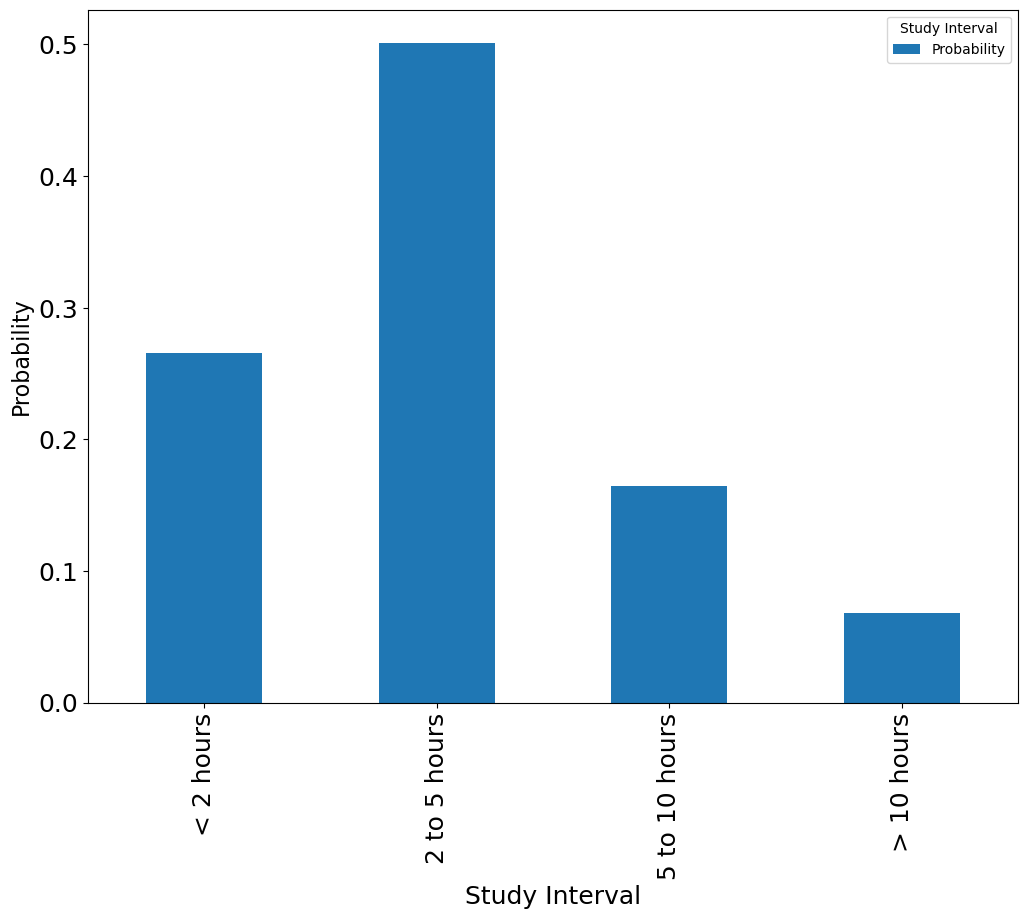

In [24]:
data_temp = data_math["studytime"].value_counts()
P_studytime = pd.DataFrame((data_temp/data_temp.sum()).sort_index())
P_studytime.index = ["< 2 hours", "2 to 5 hours", "5 to 10 hours", "> 10 hours"]
P_studytime.columns = ["Probability"]
P_studytime.columns.name = "Study Interval"

P_studytime.plot.bar(figsize=(12, 9), fontsize=18)
plt.ylabel("Probability", fontsize=16)
plt.xlabel("Study Interval", fontsize=18)

Let us call scores of at least 15 "high". The probability of a student getting a high score can be approximated by

$$P(\text{high score}) = \frac{\text{Number of students with high scores}}{\text{Total number of students}}$$

Score  Probability
Low        0.81519
High       0.18481


Text(0, 0.5, 'Probability')

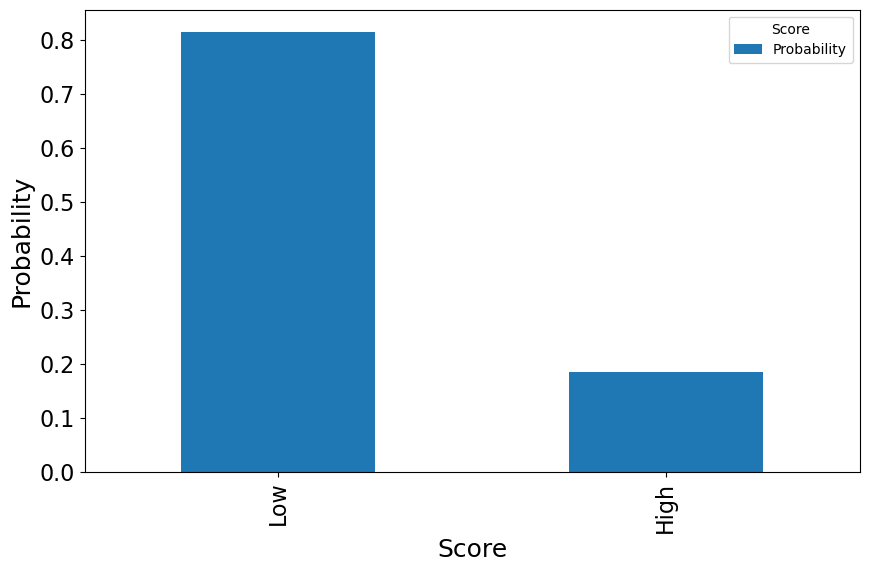

In [23]:
data_temp = (data_math["G3"] >= 15).value_counts()
P_score15_p = pd.DataFrame(data_temp/data_temp.sum())
P_score15_p.index = ["Low", "High"]
P_score15_p.columns = ["Probability"]
P_score15_p.columns.name = "Score"

print(P_score15_p)
P_score15_p.plot.bar(figsize=(10, 6), fontsize=16)
plt.xlabel("Score", fontsize=18)
plt.ylabel("Probability", fontsize=18)

The probability of the various study-intervals when the student scored high is$$P(\text{study interval}\ |\ \text{highscore})=\frac{\text{Number of students with study interval AND highscore}}{\text{Total number of students with highscore}}$$

Probability of study interval given that the student gets a highscore:


Text(0, 0.5, 'Probability')

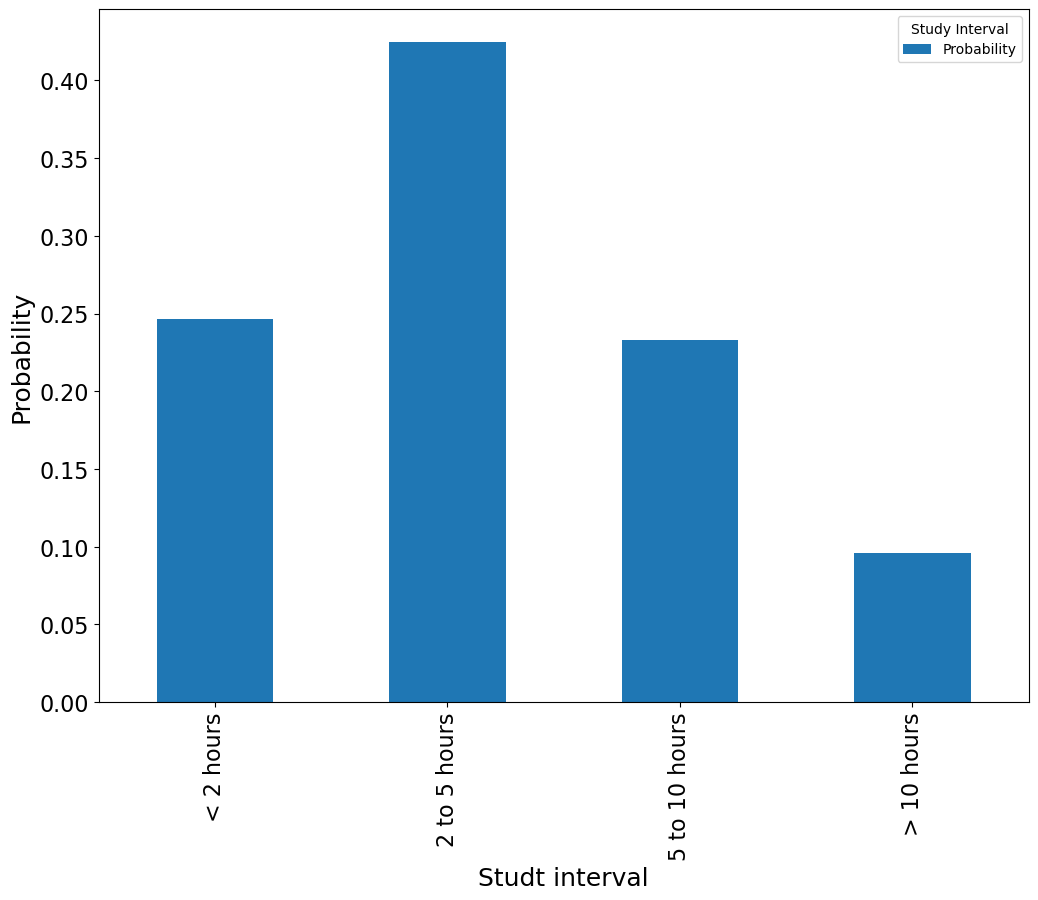

In [24]:
score = 15
data_temp = data_math.loc[data_math["G3"] >= score, "studytime"]
P_T_given_score15 = pd.DataFrame((data_temp.value_counts()/data_temp.shape[0]).sort_index())
P_T_given_score15.index = ["< 2 hours", "2 to 5 hours", "5 to 10 hours", "> 10 hours"]
P_T_given_score15.columns = ["Probability"]

print("Probability of study interval given that the student gets a highscore:")
P_T_given_score15.columns.name = "Study Interval"
P_T_given_score15.plot.bar(figsize=(12, 9), fontsize=16)
plt.xlabel("Studt interval", fontsize=18)
plt.ylabel("Probability", fontsize=18)

The probability that a student gets a score greater than 15 given that they studied for a particular period of time is$$P(\text{student getting a highscore}\ |\  \text{study interval})=\frac{P(\text{study interval}\ |\ \text{the student scored high})P(\text{highscore})}{P(\text{study interval})}$$

Probability of high score given study interval :


Text(0, 0.5, 'Probability')

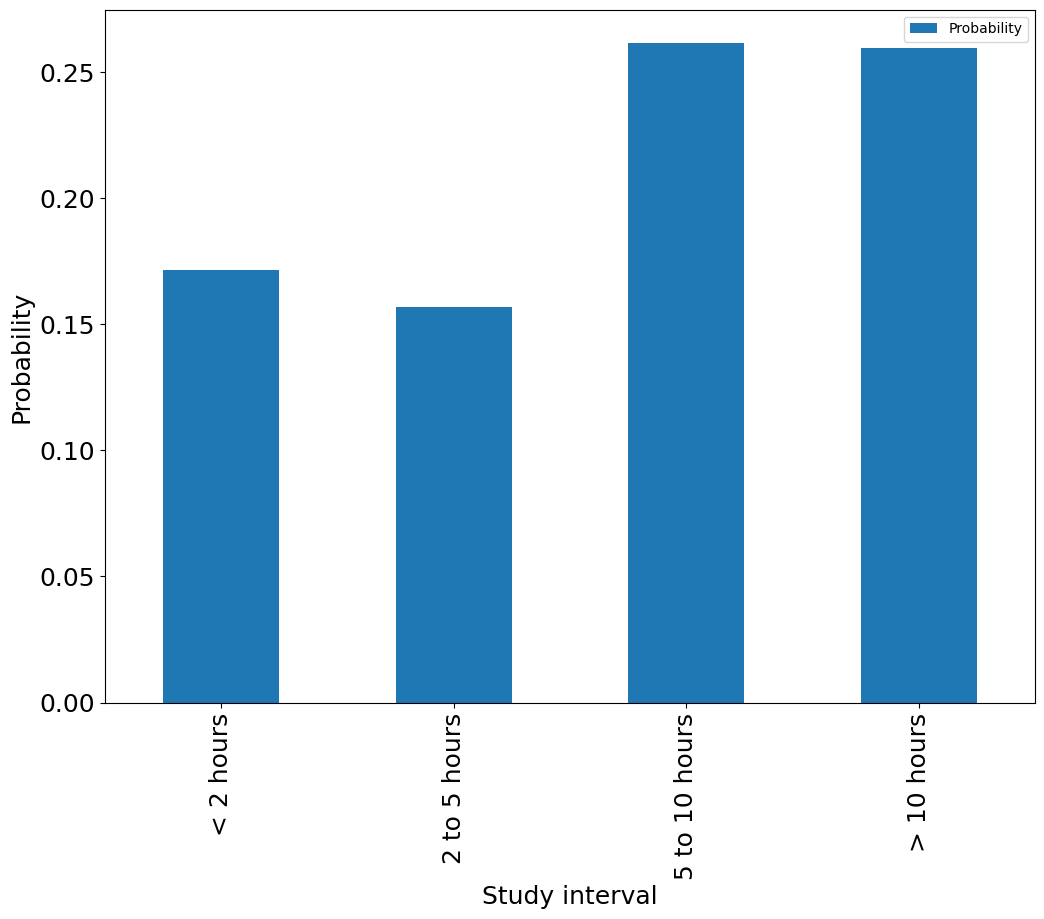

In [25]:
P_score15_given_T_p = P_T_given_score15 * P_score15_p.loc["High"] / P_studytime

print("Probability of high score given study interval :")
pd.DataFrame(P_score15_given_T_p).plot.bar(figsize=(12, 9), fontsize=18).legend(loc="best")
plt.xlabel("Study interval", fontsize=18)
plt.ylabel("Probability", fontsize=18)